## Explore Bottom Boundary Layer Dynamics in Drygalksi Trough 2018 

In [1]:
# import packages 
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [5]:
%matplotlib widget

### Import and format data 

In [2]:
# load in relevant data - TNBD and DITD 
DITD_ctd_top = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/DITD_2018_ctd_top.nc')
DITD_ctd_bot = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/DITD_2018_ctd_bot.nc')

In [3]:
# DITD velocity data (NOTE TIME IS NOT CORRECTED IN THIS SAVED DATA  - NEED TO CORRECT AND RE-SAVE)
DITD_vel_top = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/vel_1100.nc')
DITD_vel_bot = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/DITD_2018_2019/vel_1200.nc')

In [4]:
DITD_vel_top['time'] = DITD_vel_top.time - pd.Timedelta(12,'h')

In [ ]:
# rename variables in DITD velocity dataset 
DITD_vel_top = DITD_vel_top.rename({
    'east':'u',
    'north':'v',
    'up':'w',
    'pressure':'pres',
    'direction':'dir'
}).assign_coords({
    'z':1121,
    'lat':-75.28,
    'lon':164.1
})
# rename variables in DITD velocity dataset 
DITD_vel_bot = DITD_vel_bot.rename({
    'east':'u',
    'north':'v',
    'up':'w',
    'pressure':'pres',
    'direction':'dir'
}).assign_coords({
    'z':1218,
    'lat':-75.28,
    'lon':164.1
})

In [9]:
# loadi n TNBD data 
TNBD_ctd_bot = xr.open_dataset('//thepenguin/penguin2/Data/TNB/mooring/LDEO/TNBD_2018/working/tnbd_2018_ctd_bot_1093.nc')
TNBD_ctd_top = xr.open_dataset('//thepenguin/penguin2/Data/TNB/mooring/LDEO/TNBD_2018/working/tnbd_2018_ctd_top_999.nc')
TNBD_vel_bot = xr.open_dataset('//thepenguin/penguin2/Data/TNB/mooring/LDEO/TNBD_2018/working/tnbd_2018_vel_bot_1093.nc')
TNBD_vel_top = xr.open_dataset('//thepenguin/penguin2/Data/TNB/mooring/LDEO/TNBD_2018/working/tnbd_2018_vel_top_999.nc')

### Exploratory Analysis 

#### Questions: 

1. What is the vertical structure of the bottom boundary layer at DITD and TNBD, are both moorings qualitatively similar? 

2. Are there periods that exhibit high shear and is so, can it be linked to certain phenomena 

3. What tidal periods dominate? 

4. Is there coherence between the TNBD and DITD? 

Text(0, 0.5, 'Speed [m/s]')

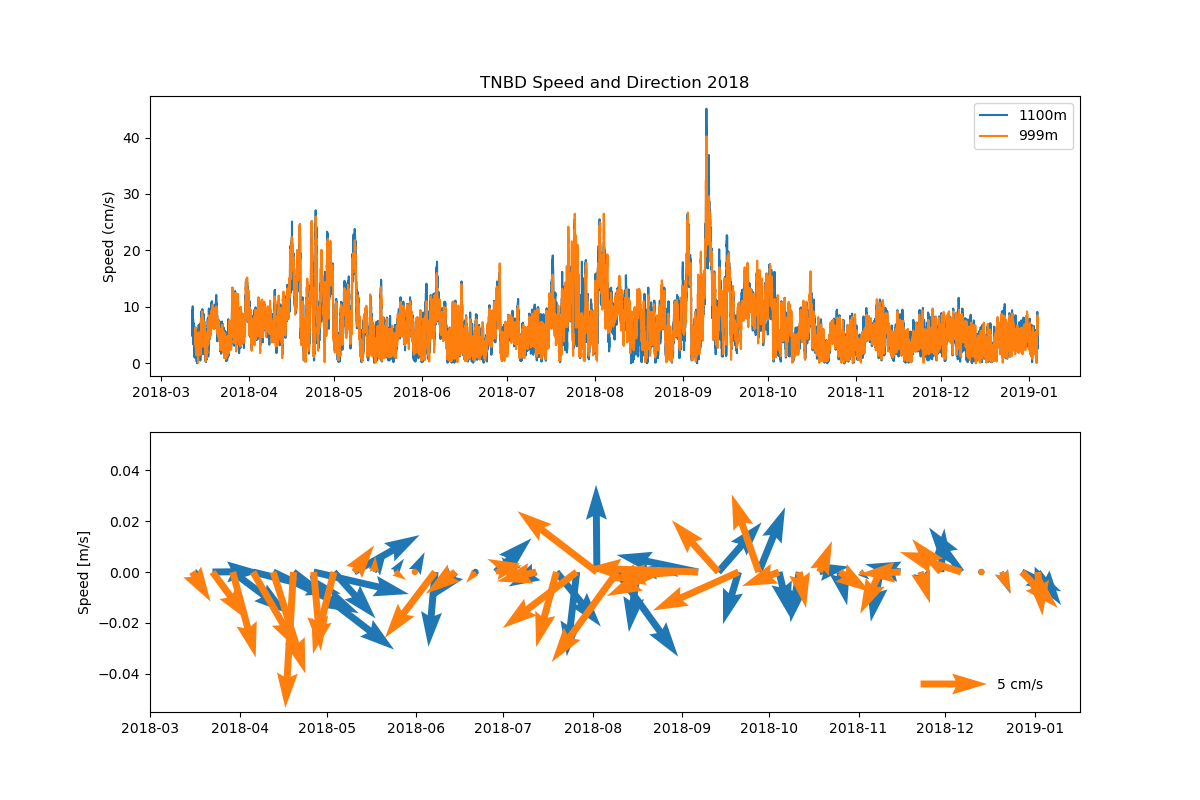

In [38]:
# time series analysis 
fig = plt.figure(figsize=(12,8))

ds1 = TNBD_vel_top
ds2 = TNBD_vel_bot

ax = plt.subplot(211)
plt.plot(ds2.time,ds2.speed,label='1100m')
plt.plot(ds1.time,ds1.speed,label='999m')
plt.title('TNBD Speed and Direction 2018')
plt.legend()
plt.ylabel('Speed (cm/s)')

# add quiver plot 


plt.subplot(212)
resample = 'W'
q = plt.quiver(
    ds1.time.resample(time=resample).mean().values,np.zeros(len(ds1.time.resample(time=resample).mean())),
    ds1.u.resample(time=resample).mean(),
    ds1.v.resample(time=resample).mean(),
    scale=70, units='width',color='tab:blue'
)
q = plt.quiver(
    ds2.time.resample(time=resample).mean().values,np.zeros(len(ds2.time.resample(time=resample).mean())),
    ds2.u.resample(time=resample).mean(),
    ds2.v.resample(time=resample).mean(),
    scale=70, units='width',color='tab:orange'
)
plt.quiverkey(q, X=0.90, Y=0.1, U=5, label='5 cm/s', labelpos='E')
plt.ylabel('Speed [m/s]')

In [48]:
# data resolutions 
# ctd bottom - 3 min
# ctd top - 1 min
# vel bot - 15 min
# vel top - 30 min
# I will resample the other datasets to 30 min to do analysis between them 
TNBD_vel_bot = TNBD_vel_bot.resample(time='30min').mean().sel(time=slice('2018-03-14','2019-01-03T23:30'))
TNBD_ctd_bot = TNBD_ctd_bot.resample(time='30min').mean().sel(time=slice('2018-03-14','2019-01-03T23:30'))
TNBD_ctd_top = TNBD_ctd_top.resample(time='30min').mean().sel(time=slice('2018-03-14','2019-01-03T23:30'))


In [53]:
TNBD_vel_top = TNBD_vel_top.sel(time=slice('2018-03-14',None))

In [58]:
# calculate delta rho 
delta_rho = TNBD_ctd_bot.sigma0 - TNBD_ctd_top.sigma0

Text(0, 0.5, 'Bottom Speed (cm/s)')

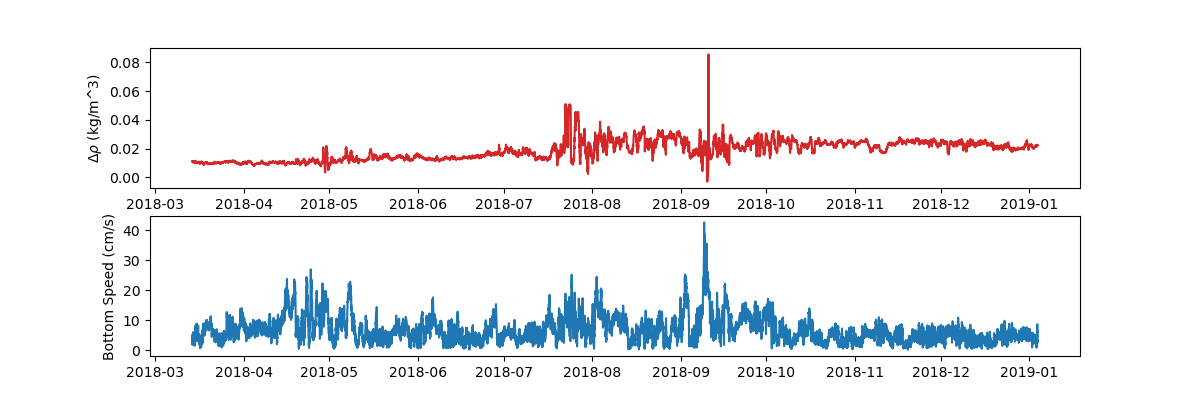

In [71]:
fig = plt.figure(figsize=(12,4))
plt.subplot(211)
plt.plot(delta_rho.time,delta_rho,color='tab:red')
plt.ylabel(r'$\Delta{\rho}$ (kg/m^3)')

plt.subplot(212)
# ax1 = plt.twinx()
plt.plot(TNBD_vel_bot.time,TNBD_vel_bot.speed,zorder=0)
plt.ylabel('Bottom Speed (cm/s)')

In [72]:
TNBD_vel_bot.z.values

array(1093)

In [73]:
TNBD_vel_top.z.values

array(999)

In [74]:
1093-999

94

In [82]:
# calculate shear 
dudz = (TNBD_vel_bot.u - TNBD_vel_top.u)/(TNBD_vel_bot.z - TNBD_vel_top.z)
dvdz = (TNBD_vel_bot.v - TNBD_vel_top.v)/(TNBD_vel_bot.z - TNBD_vel_top.z)
shear_mag = np.sqrt(dudz**2 + dvdz**2)

Text(0.5, 1.0, 'Shear Magnitude TNBD')

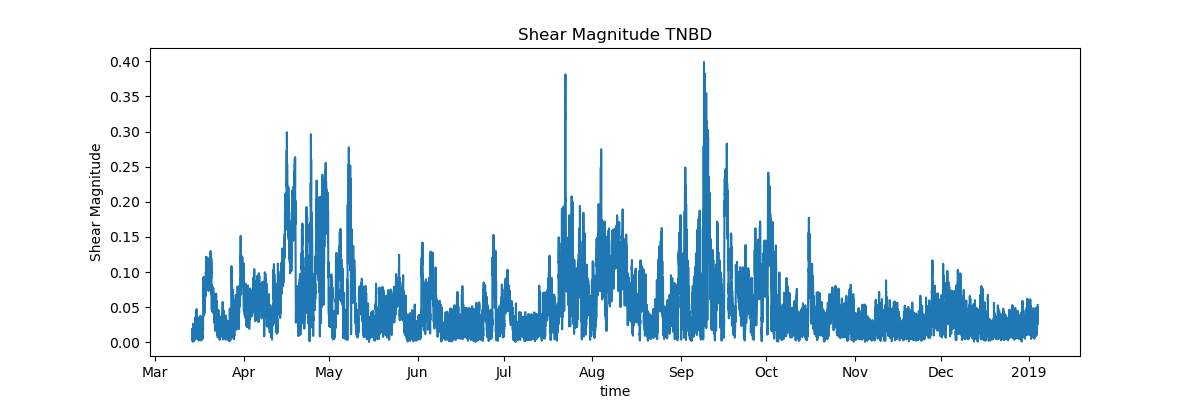

In [86]:
fig = plt.figure(figsize=(12,4))
shear_mag.plot()
plt.ylabel('Shear Magnitude')
plt.title('Shear Magnitude TNBD')

Text(0, 0.5, 'Shear Magnitude')

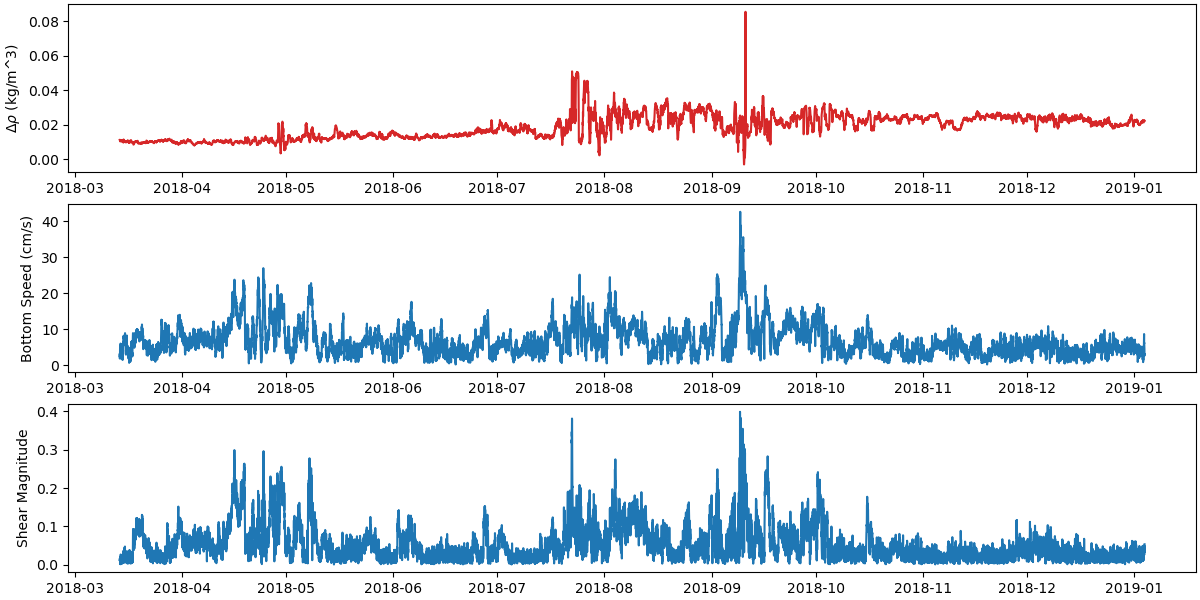

In [90]:
fig = plt.figure(figsize=(12,6),constrained_layout=True)
plt.subplot(311)
plt.plot(delta_rho.time,delta_rho,color='tab:red')
plt.ylabel(r'$\Delta{\rho}$ (kg/m^3)')

plt.subplot(312)
# ax1 = plt.twinx()
plt.plot(TNBD_vel_bot.time,TNBD_vel_bot.speed,zorder=0)
plt.ylabel('Bottom Speed (cm/s)')

plt.subplot(313)
plt.plot(shear_mag.time,shear_mag)
plt.ylabel('Shear Magnitude')

Text(0.5, 0, 'Bottom Velocity (cm/s)')

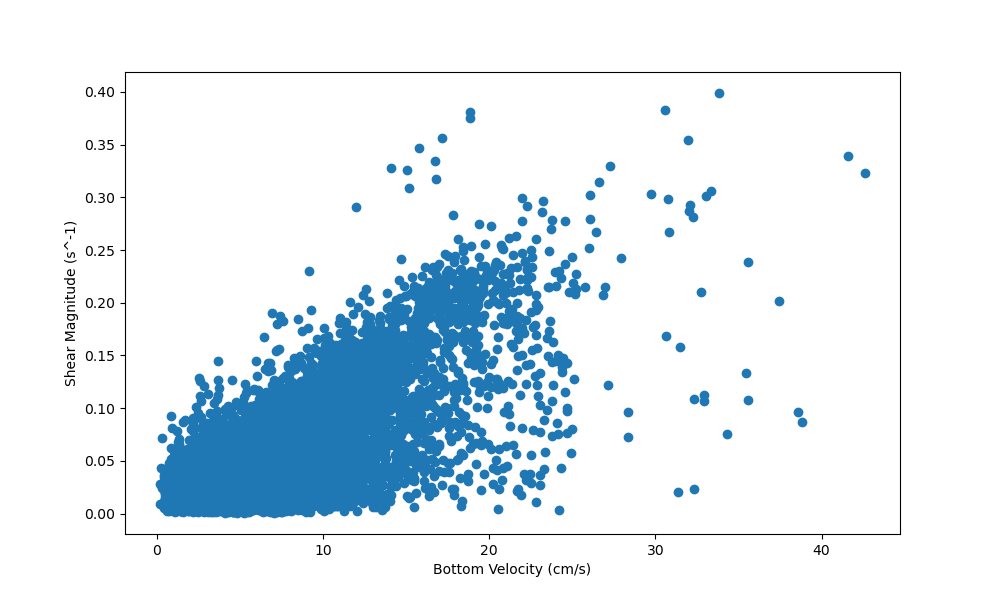

In [92]:
fig = plt.figure(figsize=(10,6))
plt.scatter(TNBD_vel_bot.speed,shear_mag)
plt.ylabel('Shear Magnitude (s^-1)')
plt.xlabel('Bottom Velocity (cm/s)')